<a href="https://colab.research.google.com/github/Neel7317/Feature_engineering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nomianl Encoding

In [ ]:
import pandas as pd
import numpy as np



df = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2'])
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [ ]:
df['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [ ]:
len(df['X1'].unique())

27

In [ ]:
df['X2'].unique()

array(['at', 'av', 'n', 'e', 'as', 'aq', 'r', 'ai', 'ak', 'm', 'a', 'k',
       'ae', 's', 'f', 'd', 'ag', 'ay', 'ac', 'ap', 'g', 'i', 'aw', 'y',
       'b', 'ao', 'al', 'h', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am',
       'j', 'q', 'af', 'l', 'aa', 'c', 'o', 'ar'], dtype=object)

In [ ]:
len(df['X2'].unique())

44

In [ ]:
df.shape

(4209, 2)

In [ ]:
# let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(df,drop_first=True).shape

(4209, 69)

We can observe that from with just 2 categorical features we are getting 69 features with the help of one hot encoding.

KDD Cup Orange Challenge
What can we do instead?

http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble

The Team suggested using 10 most frequent labels convert them into dummy variables using onehotencoding

How can we do that in python?

In [ ]:
# let's find the top 10 most frequent categories for the variable X2
df.X2.value_counts().head(10)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64

In [ ]:
top10=[df.X2.value_counts().head(10).index]
list(top10)

[Index(['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e'], dtype='object')]

In [ ]:
# let's make a list with the most frequent categories of the variable

top_10_labels = [y for y in df.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10_labels



['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [ ]:

def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [ ]:
# read the data again
df = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2'])

# encode X2 into the 10 most frequent categories
one_hot_encoding_top_x(df, 'X2', top_10_labels)
df.head()

,X1,X2,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,0,0,0,0,0,0,0,0,0,0
1,t,av,0,0,0,0,0,0,0,0,0,0
2,w,n,0,0,0,0,0,0,1,0,0,0
3,t,n,0,0,0,0,0,0,1,0,0,0
4,v,n,0,0,0,0,0,0,1,0,0,0


# Ordinal numbering encoding or Label Encoding

In [ ]:
import pandas as pd
import datetime

In [ ]:
base=datetime.datetime.now()
listofday=[base-datetime.timedelta(days=x) for x in range(0,20)]
df=pd.DataFrame(listofday)
df.columns=['day']
df

,day
0,2021-04-19 09:53:19.188480
1,2021-04-18 09:53:19.188480
2,2021-04-17 09:53:19.188480
3,2021-04-16 09:53:19.188480
4,2021-04-15 09:53:19.188480
5,2021-04-14 09:53:19.188480
6,2021-04-13 09:53:19.188480
7,2021-04-12 09:53:19.188480
8,2021-04-11 09:53:19.188480
9,2021-04-10 09:53:19.188480


In [ ]:
df['Weekday']=df['day'].dt.day_name()
df

,day,Weekday
0,2021-04-19 09:53:19.188480,Monday
1,2021-04-18 09:53:19.188480,Sunday
2,2021-04-17 09:53:19.188480,Saturday
3,2021-04-16 09:53:19.188480,Friday
4,2021-04-15 09:53:19.188480,Thursday
5,2021-04-14 09:53:19.188480,Wednesday
6,2021-04-13 09:53:19.188480,Tuesday
7,2021-04-12 09:53:19.188480,Monday
8,2021-04-11 09:53:19.188480,Sunday
9,2021-04-10 09:53:19.188480,Saturday


In [ ]:
labelweek={
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7

}

In [ ]:
df['Ordinal']=df.Weekday.map(labelweek)

In [ ]:
df

,day,Weekday,Ordinal
0,2021-04-19 09:53:19.188480,Monday,1
1,2021-04-18 09:53:19.188480,Sunday,7
2,2021-04-17 09:53:19.188480,Saturday,6
3,2021-04-16 09:53:19.188480,Friday,5
4,2021-04-15 09:53:19.188480,Thursday,4
5,2021-04-14 09:53:19.188480,Wednesday,3
6,2021-04-13 09:53:19.188480,Tuesday,2
7,2021-04-12 09:53:19.188480,Monday,1
8,2021-04-11 09:53:19.188480,Sunday,7
9,2021-04-10 09:53:19.188480,Saturday,6


# Count or frequency encoding

In [ ]:
df2=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2'])

In [ ]:
df2.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [ ]:
df2.shape

(4209, 2)

In [ ]:
len(df2.X2.unique())

44

In [ ]:
df2.X2.value_counts()

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
z       19
ag      19
d       18
ac      13
g       12
ap      11
y       11
x       10
aw       8
at       6
h        6
q        5
an       5
al       5
av       4
p        4
ah       4
au       3
af       1
l        1
o        1
aa       1
am       1
c        1
ar       1
j        1
Name: X2, dtype: int64

In [ ]:
#if we do one hot encoding then column will be
pd.get_dummies(df2,drop_first=True).shape


(4209, 69)

In [ ]:
value_count=df2.X2.value_counts().to_dict()

In [ ]:
value_count

{'a': 47,
 'aa': 1,
 'ac': 13,
 'ae': 496,
 'af': 1,
 'ag': 19,
 'ah': 4,
 'ai': 415,
 'ak': 265,
 'al': 5,
 'am': 1,
 'an': 5,
 'ao': 20,
 'ap': 11,
 'aq': 63,
 'ar': 1,
 'as': 1659,
 'at': 6,
 'au': 3,
 'av': 4,
 'aw': 8,
 'ay': 54,
 'b': 21,
 'c': 1,
 'd': 18,
 'e': 81,
 'f': 87,
 'g': 12,
 'h': 6,
 'i': 25,
 'j': 1,
 'k': 25,
 'l': 1,
 'm': 367,
 'n': 137,
 'o': 1,
 'p': 4,
 'q': 5,
 'r': 153,
 's': 94,
 't': 29,
 'x': 10,
 'y': 11,
 'z': 19}

In [ ]:
df2['Count/Freq_encoding']=df2.X2.map(value_count)
df2.head()

,X1,X2,Count/Freq_encoding
0,v,at,6
1,t,av,4
2,w,n,137
3,t,n,137
4,v,n,137


## All Techniques for Missing Values..


What are the different types of Missing Data?

#####(i) Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [ ]:
df3=pd.read_csv('titanic.csv')

In [ ]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df3.shape

(891, 12)

In [ ]:
#check for Null values in each features
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df3[df3['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### (ii)Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [ ]:
#find percentage of missing values.
df3['Cabin_missing']=np.where(df3['Cabin'].isnull(),1,0)
df3['Cabin_missing'].mean()

############or##########
#print(687*100//891) 687 missing val, 891 total no of record

0.7710437710437711

In [ ]:
df3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_missing'],
      dtype='object')

In [ ]:
df3.groupby(['Survived'])['Cabin_missing'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_missing, dtype: float64

# Missing At Random(MAR)
Men---hide their salary

Women---hide their age


### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#1.Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [ ]:
df3=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:

## Lets go and see the percentage of missing values
df3.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df3,variable,median):
    df3[variable+"_median"]=df3[variable].fillna(median)

In [ ]:
median=df3.Age.median()
median

28.0

In [ ]:
impute_nan(df3,'Age',median)
df3.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
print(df3['Age'].std())
print(df3['Age_median'].std())

14.526497332334044
13.019696550973194


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


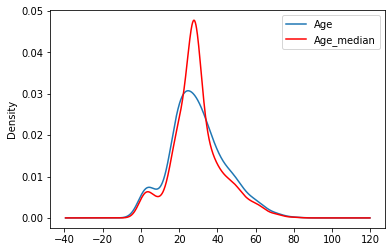

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df3['Age'].plot(kind='kde', ax=ax)
df3.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


##2.Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [ ]:
df4=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df4.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df4.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df4[df4['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
def impute_nan2(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median=df4.Age.median()

In [ ]:
median

28.0

In [ ]:
impute_nan2(df4,"Age",median)

In [ ]:
df4.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


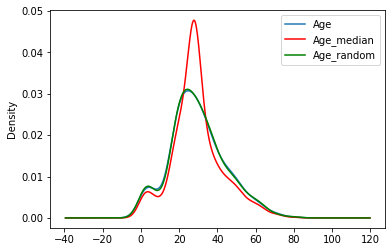

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df4['Age'].plot(kind='kde', ax=ax)
df4.Age_median.plot(kind='kde', ax=ax, color='red')
df4.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


 **Advantages**

Easy To implement

There is less distortion in variance

 **Disadvantage**

Every situation randomness wont work


In [ ]:
###


# 3.Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [ ]:

df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [ ]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
df.Age.median()

28.0

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0



**Advantages**

Easy to implement

Captures the importance of missing values

**Disadvantages**

Creating Additional Features(Curse of Dimensionality)

# 4.End of Distribution imputation

In [ ]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


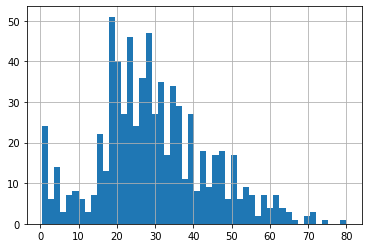

In [ ]:
df.Age.hist(bins=50)

In [ ]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


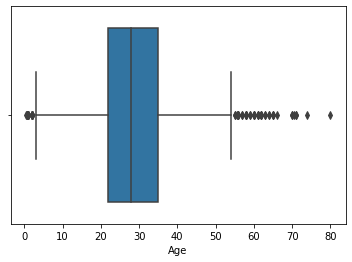

In [ ]:
sns.boxplot('Age',data=df)

In [ ]:

def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


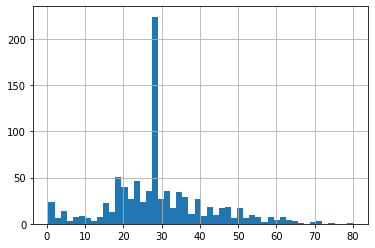

In [ ]:
df['Age'].hist(bins=50)

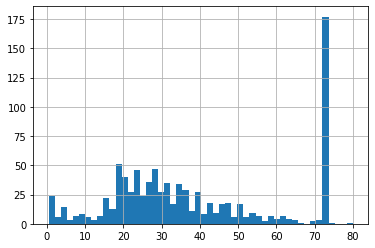

In [ ]:
df['Age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


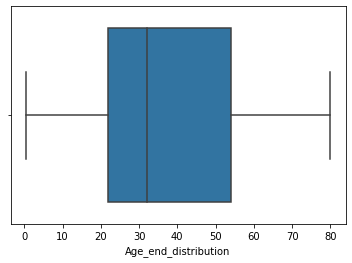

In [ ]:
import seaborn as sns
sns.boxplot('Age_end_distribution',data=df)

# 5.Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [ ]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [ ]:

def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

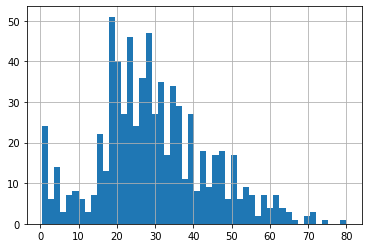

In [ ]:
df['Age'].hist(bins=50)


**Advantages**

Easy to implement

Captures the importance of missingess if there is one

**Disadvantages**

Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

Hard to decide which value to use

# How To Handle Categroical Missing Values

***Frequent Category Imputation***

In [ ]:
import pandas as pd

df=pd.read_csv('loan.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])# select Categoricial feature

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.shape

(1460, 4)

In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
#compute frequently accure feature with every category

In [ ]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

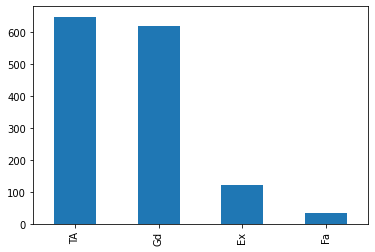

In [ ]:
#can also plot graph for that
df['BsmtQual'].value_counts().plot.bar()

In [ ]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

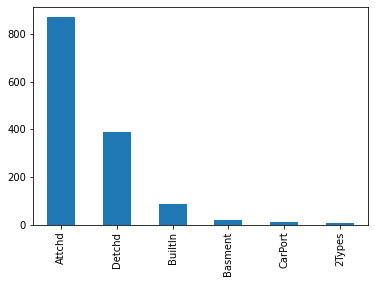

In [ ]:
df['GarageType'].value_counts().plot.bar()

In [ ]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

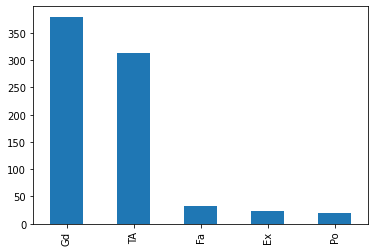

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
#for get most frequent category from any feature 
df['BsmtQual'].value_counts().index[0]
df['GarageType'].value_counts().index[0]

'Attchd'

In [ ]:
#imputation function
def impute_nan(df,variable):
  most_frequnet=df[variable].value_counts().index[0]
  df[variable].fillna(most_frequnet,inplace=True)

In [ ]:
for x in ['BsmtQual','GarageType','FireplaceQu']:
  impute_nan(df,x)


In [ ]:
#now check for empty
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

# Advantages
Easy To implement

Fater way to implement 
# Disadvantages
Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's

It distorts the relation of the most frequent label

# Adding a variable to capture NAN

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np
df['BsmtQual_val']=np.where(df['BsmtQual'].isnull(),1,0)

In [ ]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_val
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [ ]:
frequent=df['BsmtQual'].value_counts().index[0]
frequent

'TA'

In [ ]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [ ]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_val
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [ ]:
df['FireplaceQu_val']=np.where(df['FireplaceQu'].isnull(),1,0)
fre=df['FireplaceQu'].value_counts().index[0]
df['FireplaceQu'].fillna(fre,inplace=True)

In [ ]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_val,FireplaceQu_val
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


# Suppose if you have more frequent categories, we just replace NAN with a new category

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def replace_newval(df,variable):
  df[variable+'Newval']=np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for x in ['BsmtQual','FireplaceQu','GarageType']:
    replace_newval(df,x)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualNewval,FireplaceQuNewval,GarageTypeNewval
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)


In [ ]:
df.head()

,SalePrice,BsmtQualNewval,FireplaceQuNewval,GarageTypeNewval
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd



# **Probability Ratio Encoding**
Probability of Survived based on Cabin--- Categorical Feature

Probability of Not Survived---1-pr(Survived)

pr(Survived)/pr(Not Survived)

Dictonary to map cabin with probability

replace with the categorical feature

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
len(df['Cabin'].unique())#unique category 


148

In [ ]:
df['Cabin'].value_counts()

Missing        687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
C62 C64          1
T                1
C91              1
A10              1
B86              1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:

df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
#probability of survived based on cabin
prob_df=df.groupby(['Cabin'])['Survived'].mean()
prob_df

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [ ]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [ ]:
prob_df['Died']=1-prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [ ]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [ ]:
prob_encoded=prob_df['Probability_ratio'].to_dict()

In [ ]:
prob_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [ ]:
df['Cabin_encoded']=df['Cabin'].map(prob_encoded)

In [ ]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274



# **Transformation of Features**

Why Transformation of Features Are Required?

1.Linear Regression---Gradient Descent ----Global Minima

2Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

0-255 pixels

# Types Of Transformation
1.Normalization And Standardization

2.Scaling to Minimum And Maximum values

3.Scaling To Median And Quantiles

4.Guassian Transformation: Logarithmic Transformation, Reciprocal Trnasformation, Square Root Transformation, Exponential Trnasformation ,Box Cox Transformation


# 1.Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [ ]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()

In [ ]:
df_scaled=scaler.fit_transform(df)

In [ ]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

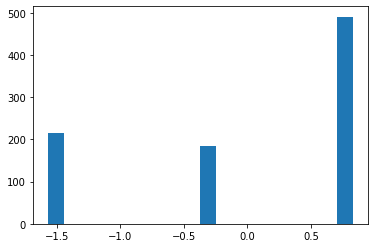

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_scaled[:,1],bins=20)#Pclass

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

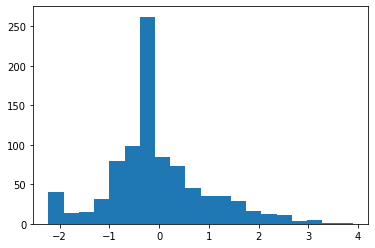

In [ ]:
plt.hist(df_scaled[:,2],bins=20)#Age

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

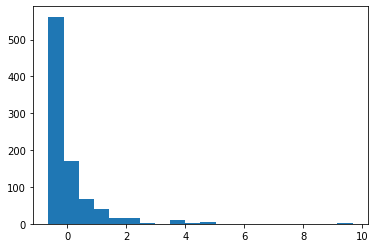

In [ ]:
plt.hist(df_scaled[:,3],bins=20)#Fare

# 2.Min Max Scaling (### CNN)---Deep Learning Techniques

Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_minmax=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

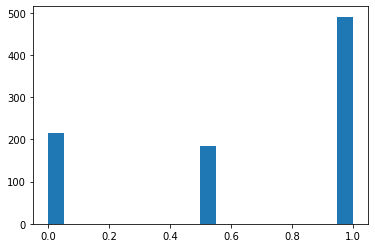

In [ ]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

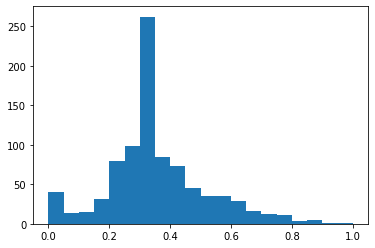

In [ ]:
plt.hist(df_minmax['Age'],bins=20)


# 3.Robust Scaler
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

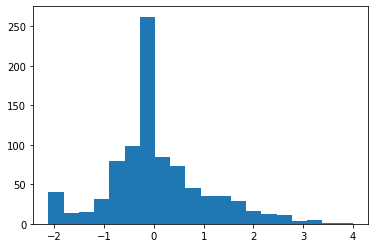

In [ ]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

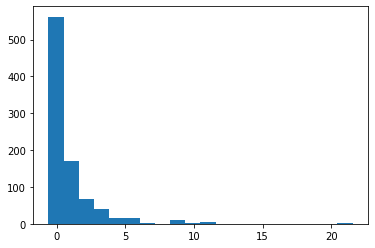

In [ ]:
plt.hist(df_robust_scaler['Fare'],bins=20)

# Guassian Transformation or Normal Distribution

Its a technique use to convert Feature or data to be Normal Distribution, if our data or feature is left skeewd or right skeewd then we have to apply Gussian Transformation on that. 

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

--logarithmic transformation

--reciprocal transformation

--square root transformation

--exponential transformation (more general, you can use any exponent)

--boxcox transformation

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [ ]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

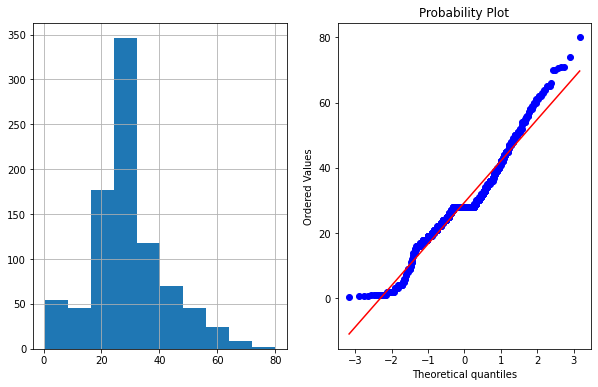

In [ ]:
plot_data(df,'Age')

--**Logarithmic** Transformation

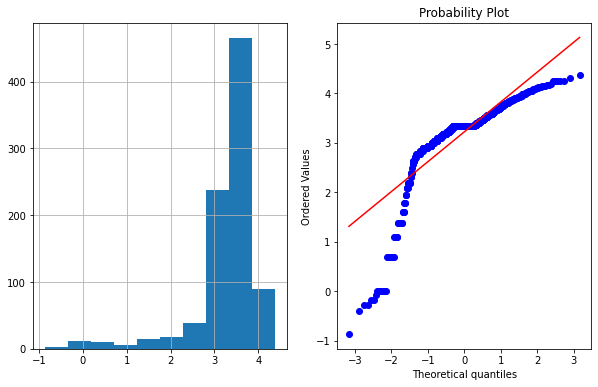

In [ ]:

df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')


**Reciprocal Trnasformation**

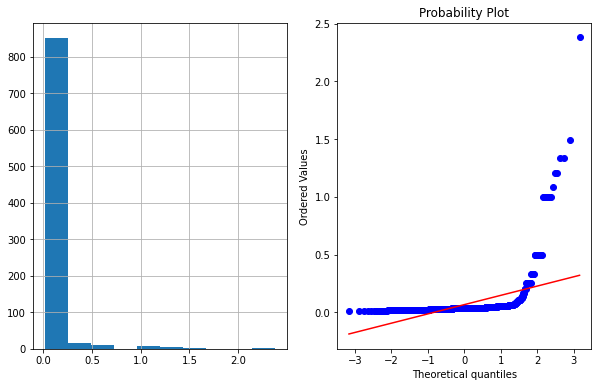

In [ ]:

df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

**Square Root Transformation**

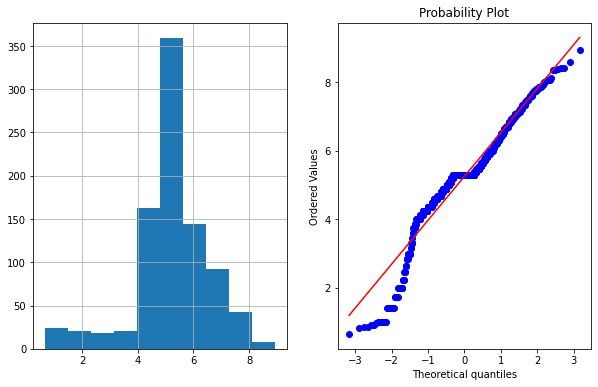

In [ ]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

**Exponential Transdormation**

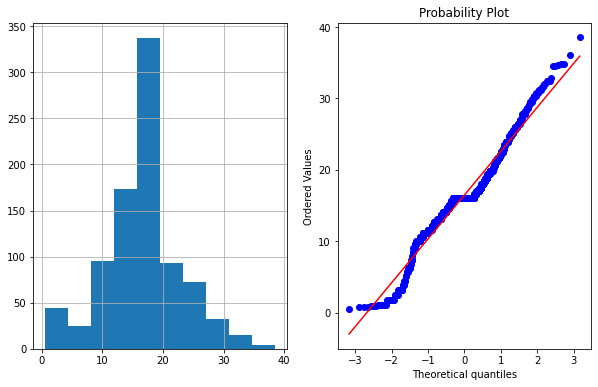

In [ ]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')


**BoxCOx Transformation**

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [ ]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [ ]:
print(parameters)

0.7964531473656952


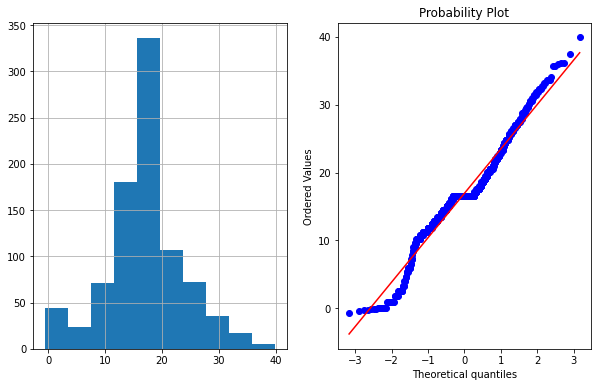

In [ ]:
plot_data(df,'Age_Boxcox')

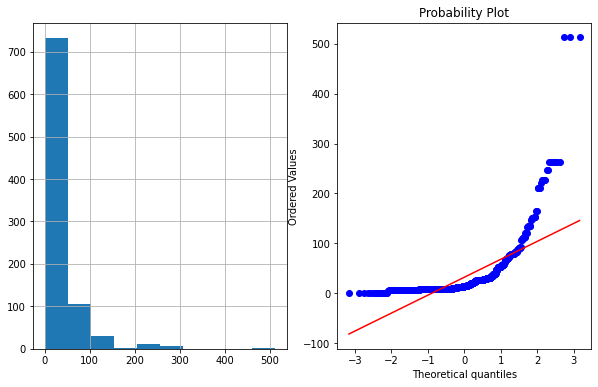

In [ ]:

plot_data(df,'Fare')

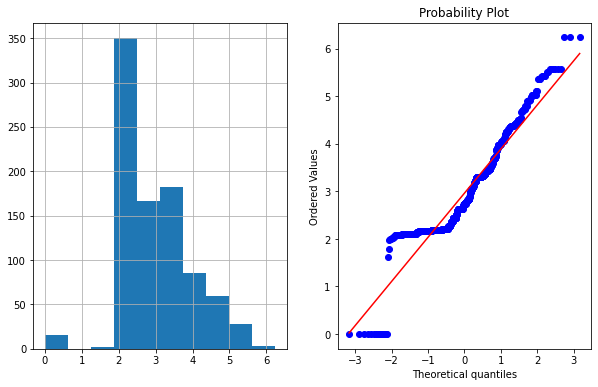

In [ ]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

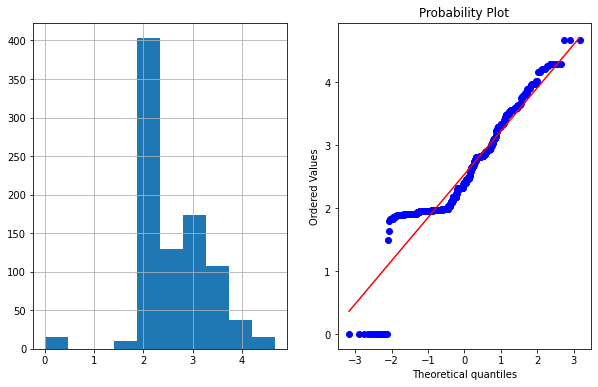

In [ ]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')